In [1]:
# Import the required packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
reviews = pd.read_csv('./IMDB_sample.csv')
# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review) 

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)

# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all      also        an       and  any       are  \
0    0.0  0.000000  0.000000  0.000000  0.000000  0.050874  0.0  0.000000   
1    0.0  0.000

In [2]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Define the vector of targets and matrix of features
y = reviews.label
X = X2

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.739234768697507


In [3]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Define the vector of targets and matrix of features
y = reviews.label
X = X1

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.7408345553926143


In [15]:
# ```
tweets = pd.read_csv('./Tweets.csv')
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=list(my_stop_words))
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0           0         

In [16]:
# Define the vector of targets and matrix of features
y = tweets.airline_sentiment
X = tweets.drop('airline_sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

# Create an array of prediction
y_predict = log_reg.predict(X)
from sklearn.metrics import accuracy_score
# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

ValueError: could not convert string to float: 'Bad Flight'

In [ ]:
# Import the required packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
reviews = pd.read_csv('./IMDB_sample.csv')
# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review) 

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)

# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

In [23]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the vector of labels and matrix of features
y = reviews.label
X = X_df2

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.742
Accuracy on test set:  0.7255163224516988


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7241226121723678
Confusion matrix test set: 
 [[0.36472679 0.13949356]
 [0.13638383 0.35939582]]


In [25]:
# Import the accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(X_train, y_train)

# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict))

Accuracy score of test data:  0.7227898711683696
Confusion matrix of test data: 
 [[795 354]
 [270 832]]


In [26]:
# Import the accuracy and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.7227898711683696
Confusion matrix of test data: 
 [[0.35317637 0.15726344]
 [0.11994669 0.36961351]]


In [27]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.7724442  0.65440957 0.58288378 0.33946333 0.92987012 0.80410385
 0.35080326 0.69703295 0.5267362  0.20877056]
First 10 predicted probabilities of class 1:  [0.2275558  0.34559043 0.41711622 0.66053667 0.07012988 0.19589615
 0.64919674 0.30296705 0.4732638  0.79122944]


In [28]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.7215189873417721
Accuracy of model 2:  0.6575616255829447


In [29]:
# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('Confusion matrix of model 1: \n', confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.7215189873417721
Accuracy of model 2:  0.7181878747501665
Confusion matrix of model 1: 
 [[0.36842105 0.15256496]
 [0.12591606 0.35309793]]
Confusion matrix of model 2: 
 [[0.3697535  0.15123251]
 [0.13057961 0.34843438]]


In [4]:
positive_reviews = ' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n 10 stars: This is one of the best video concerts ever. The sound, visuals and performances are top notch. It is a real joy. I have owned it a week and watched it 3 times already. Every performance is good. There are no dead spots during this concert and you get quite a number of them. A keeper. Memorable.\r\n Informative: The book, although hard to get excited about in the begining, offers insight into confrontations that you experience any given day during your life. It\'s thorough and offers helpful ideas.\r\n Book: Armed Response: A good book for Self-Defense folks. I was hoping for something new but it pretty much reiterated what we already know (preaching to the choir). Not a bad evening read.\r\n Armed Response: This is a very good book for the person who plans to carry concealed firearms. The logic is clear and the recommendations are sound. Unfortunately, the proof reading is atrocious. In the early chapters paragraphs are repeated and there are other other problems. I lined out several sentences that were misplaced and had to tape in a loose page that came with the book. The book is sound and I would have given it a 5 if the proof reader had not messed it up.\r\n EXCELLENT FOR NOVICE OR EXPERT: For 36 years I have instructed a wide variety of novices, experts and "so-called" experts. This book will take you from nothing - to all you really need to know (unless you are into "one-upsmanship" or trying to prove something about your masculinity or lack of it). For those (who are using this forum to display their resumes) if you are insecure then you will take your stack of books and your ego and look for anything that might have been left out. You might even list all the books you have, but the truth is, if you are really good at real-life situations, whether actual military combat, law enforcement or the usual combat games, .... all the book-learning in the world is no replacement. This book is well worth what you pay for it, and that\'s the point of these reviews, not better-than-thou cynicism from would be intellectuals.\r\n Armed Response: is essential: If your looking for a great book that addresses the use of lethal force than this is it. A great place to start be it a beginner or old timer this is a must read. David Kenik not only wrote well but put it in a format that is understandable. Well thought out! This is a must have book for anyone who wants to understand what is needed to justify an armed response. It does not replace personal training or what can be learned in a class (interaction). It does however build a great foundation for what is needed to to understand in responding with lethal force. If you own a firearm for personal protection than you need to own this book.\r\n A "must read" for any handgun owner: I ordered this on a recommendation from a coworker. He is a former Sheriff\'s Deputy and is thoughtful and level-headed. The information in the book is well reasoned and clearly explained and should be required reading for any new handgun owner or those considering a gun purchase for self-protection.\r\n Read this if you carry concealed: This is an in-your-face, tell it like it is, discussion of the good and bad of carrying a concealed weapon. The snap decisions you might make under extreme pressure may have dire consequences unless you understand what you can and cannot do to defend yourself. Very enlightening. A quick read on a very serious matter.\r\n Boring but useful: I must admit, this book is pretty lame in its organization and all. But there was still a load of stuff that I wouldn\'t have known, so there is some useful content here. (Heh... I couldn\'t have passed my test without it...) \r\n Great for drivers awareness: I have read some of the reviews and it appears to me that the ones who don\'t like this book are the children who had to read it. First of all this book is not written for each state, so you will have to check on your own state or county laws along with this book. As for this book not helping you pass the "TEST". Responsible drivers know that their is much much more to driving then passing the "TEST", which this book goes into great detail letting its readers know. I\'ve been A police officer for almost 9 years and now work at a school and deal with children all the time and a lot of thing seem boring to them. But we as adults must continue the teach, and hope that some of what they read sinks in. When dealing with driving a vehicle, learning by experience a lot of times ends up to late. This book doesn\'t teach you how to pass the "TEST" it teaches you how to be a better driver, something we all need to be...\r\n Difficult, but all-around enjoyable: Count Dracula has married Queen Victoria, and vampirism is the hip new trend for anyone who wants to be anyone. A mysterious killer is cutting down young vampire prostitutes in the streets, and the police have received a letter claiming credit from someone who calls himself Jack the Ripper. If you enjoy classic vampire stories, mysteries, Victorian London, or just a really good story, it\'s worth taking a look. My only complaint is that the tangled threads of multiple viewpoint characters get confusing. There are quite a few characters to keep track of, each with their own agendas. Most of them are familiar from other works (the good Dr. Jekyll inspects a recent murder victim; when he is visited for further questioning, he\'s consulting with his friend Dr. Moreau), and there\'s a healthy appendix at the end that lists historical and fictional references by chapter, but it\'s still a lot to keep track of.\r\n Alternate History meets Classic Horror:  Kim Newman\'s gothic horror novel, "Anno Dracula" is a fine riff of Bram Stoker\'s original masterpiece. Newman asks the reader a simple question: What if Dracula had won in his confrontation with van Helsing and the other protagonists from Stoker\'s novel? His ultimate objective, it appears, was to marry Queen Victoria and claim the British throne for himself. To cement his rule, the vampire spreads his curse to create a whole new class of subject, the undead. Within this mess Dr. Seward finds himself cast in the role of Jack the Ripper as he seeks to destroy the undead in his quest for vengeance. With a fine eye for literary satire Newman throws in plenty of Victorian characters from other great works just for kicks. If you liked Dracula and don\'t mind the occasional "What If" scenario then you might want grab a copy of this hard to find gem.\r\n Enthralling: I\'m very glad to have discovered this original, complicated but enthralling book by Kim Newman. In this take-off of Bram Stokers Dracula, the Count survived execution and went on to become the consort of Queen Victoria in 1888. England is made up of the "un-dead" and the "warm," and when a killer \'Silver Knife\' begins murdering vampire prostitutes, they must work together to track him down. Many names from the original Dracula, as well as other literary works find this way into the story, which is fun. I had a little trouble sticking with this book at first--it is quite complex and with many characters--but once I got pulled in, I could not put the book down. I highly recommend this for fans of the original Dracula.\r\n So glad Titan Books Reprinted this!!: It is 1888 and vampires are everywhere! From holding elite positions in the government to overwhelming the slums of Whitechapel, vampires have integrated into society. How would the presence of vampires change Victorian, England? This is exactly what Mr. Kim Newman tackles in his thriller novel \'Anno Dracula\'. Not only is Newman spot on in his depiction of London in 1888, but he also brings in a wide range of fictional characters from Victorian novels including their authors! Characters Charles Beauregard and Genevieve Dieudonne team up to be an unstoppable duo in search of Jack the Ripper. It is hard to put the book down once you\'ve started reading. So glad Titan Books reprinted this! I hope they continue with the sequel Anno Dracula: The Bloody Red Baron, which takes place in 1918, or I will have to get crafty and find an old copy myself!\r\n Please make a reprint of this book.: For me, Steampunk started with this book. It brought to me the beauty and anachronisms of the Victorian culture mixed with the surprises and action of modern sci/fi. My wife, who loves vampire stories probably even more than I do, had never read the book and when I went about trying to find a copy of it for her, it seemed impossible. Thank god for the internet (and to a lesser extent, Amazon). I was finally able to get a used hardback for a sum that wasn\'t too insulting. My wife tore through it and loved the weirdness as much as I do. It is crazy that this book has not had a recent reprint. Who ever is responsible for that should be slapped once or twice.\r\n Unique presentation of the vampire genre: This is a truly unique novel. Newman presents us with a London virtually taken over by the undead. Vampires have come out of hiding and are now fully "out". Living people (referred to as "warm") flock to be turned, and vampires are now found in every walk of life from government to shop keeper to prostitute. Newman is extremely detailed, and he introduces numerous characters while weaving in actual historical occurrences into the story. We get a glimpse of this London at the time of the Whitechapel murders; only this time, the Ripper preys on vamp prostitutes, and his identity harkens back to Stoker\'s DRACULA. All in all, this is a delightful and creative novel. It is a breath of fresh air amidst the Lestat wannabes. Keeping up with all the different characters can be a task, but if you give this novel a chance, you most definitely won\'t be disappointed. This is the first novel of a trilogy, and I\'m rushing to read the next in the series (BLOODY RED BARON).\r\n Riveting: One of the best suspense books I have had the pleasure to read. The characters are a dynamic mix that make the story had to put down. You develop and understanding for the villian were you empathize with him while at the same time you feel for the hero and heroine to catch him. A must read for those who like suspense novels.\r\n Aids in hands-free phone usage: I use this phone holder every day on my commute, in conjunction with an auto charger and hands-free earset. I find it indispensable in securely fastening the phone in place, yet easily removable. It makes one-hand dialing easy, and I don\'t have to worry about the phone sliding around because of sudden turns or stops. One word of note: it doesn\'t accept the use of oversize extended-life batteries.\r\n Inside a Secret Nation: I bought this book on ebay, as it\'s been out-of-print for years. Don\'t bother with the movie; not only is the casting all wrong, but the reality was 100 times worse. Caranza Tene looked nothing like Judd Hirsch and was unbelievable violent. Steven Tene grew up in a culture where kids weren\'t allowed to go to school and had to beg and steal for their families. Girls were married off at age 11 and had to work, while their husbands did nothing. Loyalty meant giving all your earnings to your husband or father. If you made your fellow Gypsies angry, they\'d lie to the police to get you in trouble. I\'d like to see this book reissued, with a chapter on where they are now. Caranza Tene is definitely dead, and Steve Tene must be in his 60\'s. The telephone psychic industry probably cut into the market for fortune-tellers, so I wonder if the women now have regular jobs?\r\n a new king: Steve Tene Bimbo was 25yrs old when his grandfather King Tene died. The grand father skipped over his son (a fat gross slob) to give Steve the medallion and the ring of kingship. This set off a war. Gypsies are mostly known for their grift, scams and cons but when called upon they can fight and kill too. Several attempts are made on his life but he survives. Read this book and see what happens. Steve tells author Peter Maas that he wants to change and he wants to change the way the gypsies live. The book ends there and we do not know if he was successful. The book is very very short. You can read it almost in 1 sitting. Some of the reviews are longer than the book.bbp okc ok2009\r\n C\'est magnifique! il y a du vrai dans ce qui\'l dit.: Il y a des temps que Mr. Coello nous avons donné une histoire de honor et de mystère. Cet histoire étre publié en different langues. Je l\'ai li en anglais et en franais seulement. La histoire rendu étai fidèle, excellent, et grand. Il raconte du rve de un bon garon que cherche le monde pour trouver un inconnu trésor. Il l\'a réussi... mais... Je suis certain qui il a trouvé deux trésors... voila! vous devez lire la histoire maintenant pour découvrir le mystére; s\'il vous plait.\r\n FRUSTRATING OMMISIONS: IT IS VERY DIFFICULT TO ACKNOWLEDGE THIS VIDEO COMPILATION AS PERFECT DUE TO A NUMBER OF INCREDIBLE OMMISIONS. ALONG WITH IGNORING THE TELEVISION PERFORMANCES FOR \'STARMAN\' AND \'REBEL REBEL\', THERE ARE NO VIDEOS BETWEEN THE YEARS 1973 AND 1977, A TIME IN WHICH BOWIE HAD MANY FANTASTIC SINGLES INCLUDING \'FAME\', TVC15\', \'GOLDEN YEARS\' AND \'SOUND AND VISION\'. HOWEVER, IT REMAINS A MUST FOR BOWIE FANS. HIGHLIGHTS: \'LIFE ON MARS\', BE MY WIFE\', BOYS KEEP SWINGING\', \'CHINA GIRL\' AND THE BEST VIDEO OF THE LOT- \'ASHES TO ASHES\'.\r\n TRUE WORSHIP: Nomatter what I am going through, Darien and LW\'s music is always able to bring my back into focus. If you are looking for a true worship album, this is the ONE!! There are lots of "worshippers" and commercialized gospel singers out there doing the best they can, but you can tell when the focus goes away from the Lord. Darien\'s writing stays true to the reason we sing, and that is the Almighty King. You will fall down on your knees. You will dance and shout in praise! BUY THIS ALBUM - IT WILL BE THE BEST SPIRITUAL INVESTMENT YOU EVER MAKE (AFTER ACCEPTING CHRIST)!\r\n Great CD: Love Regina\'s work, love Jazz. I am a violinist and love hearing the violin played in different genre\'s love what she does\r\n LIFE CHANGINGING BOOK: THIS BOOK WILL CHANGE YOUR LIFE ( WORK,RELATIONSHIPS AT HOME,FRIENDS),IF YOU UNDERSTAND AND PRACTICE THE SKILLS DESCRIBED IN THE BOOK.IT CHANGED MY LIFE. MANY THANKS TO THE AUTHORS.\r\n Crucial Confrontations: A must read for supervisors and managers. With outstanding proven approaches to knowing what you want from a conversaton, what the other wants, and watching out for the relationship. Found it useful at work as a reference book, plus a great read for personal relationship communications as well. Would suggest reading Crucial Conversations first to really get the full view.\r\n TERRIFIC BOOK: I saved my job by reading this book. One of my co-workers and I were having a difficult time getting along. I loved my job, but this friction between the two of us was really starting to bug me and although the job market is tight right now, I had decided to float my resume around and see what was out there. BUt, I went to the bookstore and saw CRUCIAL CONFRONTATIONS. It had so much great advice on how to deal with confrontation in a positive way. By using the books advice, I was able to "confront" my co-worker and I realized we really were not that far apart in opinions... we just expressed them differently. It would be a stretch to say that we will be best friends, but I do think we have reached a common ground and I no longer feel the need to leave my job. Go buy this book if you are have difficulty in your job. marriage or family... It is worth every penny.\r\n Cute book and a fast read: Absolutely charming book, great for all grade levels. I usually run for the gory, werewolfie or anne boleynesque books, but it was refreshing to pick up something sweet AND interesting for a change. Buy this for the MG reader in your life, but read it for yourself first!\r\n Great if you have the RIGHT sound setup: I almost sent this item back because the sound was so uneven going back and forth between loud and soft for no reason. luckily I ran across a comment by someone who mentioned you had to use 5.1 or DTS in the sound setup to get it to work right. Sure enough, Doby sounds awful, but when I selected 5.1 the sound was perfect. After that I enjoyed a really great concert with some excellent cuts from Eric Clapton, Mark Knopfler-Dire Straits, Sting, Paul McCartney and many others. Brothers in Arms, Money for Nothing, Layla, Hey Jude and a great rendition of Kansas City with everyone joining in. If you think you might like this DVD you will, so buy it, just be sure you use 5.1 or DTS!\r\n Great Music: This is a great music DVD I love it. Lot\'s of rock stars and loads of songs, I am very pleased. Money well spent, If you like this DVD you will love "A Concert For George" that was a ten plus+++++\r\n Outstanding content: I have a $20,000 stereo with DTS, SACD 3100 watts. This is far and away one of the best content, musicians, songs etc... that I own. The sound quality is a 4 out of 5 but the songs and musicians more than make up for it. A definite must for any audiophile.\r\n rare concert, awesome audio: I recently watched this at a friend\'s house. He has an excellent surround sound setup and this DVD has DTS. amazing.as a habit I don\'t like live concert video - rarely buy them.the guest artists are phenomenal - Paul McCartney at the end is lots of fun/great songs. How many times are you going to see Clapton and Knopfler playing together, filmed well and in DTS?you just can\'t go wrong with this DVD.\r\n Excellent DVD: Music for Montserrat is an exceptional DVD. Every artist, Eric Clapton, Paul Mc Cartney, Elton John, just to name a few are wonderful and the sound is amazing. A great addition to anyone\'s DVD collection.\r\n An Excellent DVD Concert: As a survivor of the Woodstock generation these artists play the music I love to hear. The musicians are in excellent shape, the line-up is superb, the selections are well-chosen and the DDS 5.1 mix is a showroom example of a proper live concert mix. Ambient and live but clear and focused. All in all an excellent sounding DVD of some top-flight musicians and songwriters strutting their finest stuff with Sir George Martin adding some very fine string embellishments to many of the songs. If you like these artists and their music this DVD will not disappoint you.\r\n Excellent overview: This overview of the trio\'s songs is excellent, although if you own the Motown Hits anthologies, you already own 75% of the songs. Has rare mono mixes of Freda Payne\'s "Band Of Gold" and the Chairmen Of The Board\'s "Give Me Just A Little More Time." Informative liners notes.\r\n THE CREAM OF THE CROP!!!!!!!!!!: The finest pop songwriters get a piece of their due with this three disc set. There were no finer writers than HDH during the second half of the twentieth century and this set is testimony to that. Sadly, most of these songs are available elsewhere and avid Motown fans will find this redundant. Great mono versions of a good chunk of their biggest hits but a second volume is called for with more of the post Motown output and a deeper look into the vaults for demos of some of the literally hundreds of top shelf songs these guys wrote. How did they do it? Don\'t have a clue but I sure do love these songs...\r\n Riding in Cars or Boats with Kids: . Tom Bodett - the "We\'ll leave the light on" Motel 6 guy - wrote and performs this cautionary tale of respect for the whims of Nature for kids and their parents. Part "slice of life" in the Alaskan "bush," part sociology - can "bush" and "town" kids find common ground and interests? and also a warning on why kids should listen to grown-ups (all these years and we really HAVE learned something ;-), this captivating adventure will while away the hours whilst travelling.\r\n Good book for young teens: Ok, the kids accused me of reading it because its full of boats, dories, fishing boats, rowboats, skiffs, mailboats etc and they are right. But I liked it most because it showed the kids thinking and the dangers of not trusting your brain when you are in trouble and the way out is not by getting into more trouble. The kids, before committing to read it, also wanted to know that no dogs die, and no one dies in the story. They are sick of stories where the main character or their dog dies. So there are dead people mentioned in the book, a dead mother, but she\'s long gone by the time the story starts. Anyway I liked it. The depiction of being out in the storm was very true to life, as was the actions of the kids.\r\n Overall Good Book: Book was great and a nice read... but the cover was dirty, don\'t know why Amazon would sell a dirty book.\r\n conversation tools: I liked the book and definitely picked up on tools for working thru violated expectations. Everyone could take away and use something from this book. Well worth the $s spent.\r\n Great resource: I loved looking at this book. It covered a lot of variety of types of chests and provided interesting historical and culture facts, as well as personal stories for specific chests. The pictures to text ratio is perfect. I wish there was a little more information on consrtuction--there was some useful information on types of construction for the wood itself, but I would have liked to see information on materials/woods used, latches, locks, handles, and strapping/corners. Still, I am very happy with my purchase.\r\n Admirable!: Based on her theosophic and new thought principles, these poems had tremendous influence on helping people to come into a sense of personal power and independence. Truly a most inspirational woman!\r\n Uncovering the rage about Bettie Page: After years of seclusion, most of the secrets of, by and about Bettie Page are revealed in this well-composed and long overdue profile of the most photographed model in history.Ms. Page may still wonder at the inspiration and sensation (and consternation from members of Congress) she caused in the mid-1950\'s... what this book clearly does, is testify as to why her image is still sought after by fans and collectors. Easy, lively reading and plenty of pictures rates this as the best book available on the Page rage.\r\n GREAT BOOK IN EVERY WAY: This is the ultimate book on Bettie Page. This book is for every true Bettie fan. Even contains an introduction from Bettie herself. If you really want to follow the history of legend, this is the ultimate book on Betty Mae Page!\r\n 4,5 stars Amazing album: If you like Slayer then this is a must album. The drums with Dave Lombardo are once again simply perfect. The songs are very rhytmic and aggressive. The sound of the guitars and the vocals are really great. Just buy this album .\r\n great accessary: recently,I purchased a nikon camera.this is a great addition for my camera. I am able to see my pictures immediatly on the television.\r\n NIkon EG-D2 Audio Video Cable for Nikon: This item is very well built, and works great with the Nikon Camera it was purchased to support. I recommend this item.\r\n Can\'t get too much of a good thing.: In Crucial Confrontations these 4 author/practitioners continue on the Crucial Conversation path. They begin with definitions of terms, move to concrete examples and provide useful tools for improving dialogue in tough situations, in all aspects of life and work. The ability to have a tool for measuring your abilities in holding crucial confrontations is appealing as we all like to know where we stand. They also offer lots of tools on their website that supports this current work - www.crucialconfrontations.comThere are no absolutes for how we hold crucial confrontations and these 4 authors provide a template from which to work so that anyone can be successful. Authentic, Credible and great to know you are not alone in this navigation toward improved communications.\r\n An excellent approach to interacting management: I had a wonderful time reading the book (and taking notes). It reminded me of the multiple occasions in which I have failed for lack of skills, but also showed me that there is a methodology to follow next time I have to confront a violated expectation (probably within the next five minutes)\r\n Great job: I appreciate the books a great deal. They are wonderful tools for improving communication, which is something we all need, and especially when the stakes are high. Great book.\r\n Regina Carter., Motor City Moments, I\'ll Be Seeing You, Paganini After A Dream.: I\'m reviewing all three Albums together as they are by the same artist; Regina Carter. Again I purchased these Albums on the basis of a 30 sec listen. They all lived up to my expectations. If anyone is familiar with Stephane Grapelli, Regina Carter\'s style is very similar. She really swings. I love these albums and play them over and over again.\r\n amazing: "Motor City Moments" is Regina Carter\'s 4th CD and it is amazing to listen to. It opens with an uptempo, improvisational-like, number, "Don\'t Git Sassy" then settles into a contemplative, salsa tune "For Somoeone I Love," where Carter plucks her violin then make it laugh, weep and glide all in one song. I haven\'t heard the Milt Jackson version, but it would be interesting to hear the original to see how this interpretation is different. There also some interesting selections like "The Love Theme from Spartacus." Carter\'s lamenteous violin is softly accompanied by Marcus Belgrave\'s flugelhorn. In some instances, the two instruments merge into one sound. But the ultimate gem in this CD is Carter\'s version of Chattanooga Choo Choo. It should be a standard violin piece much like Mozart\'s Sonatas. It sounds like it was written for the violin and Carter is in absolute command here, with such fire and fluidity, I\'m definetly impress! One should buy this CD just for this number alone.\r\n An Unfound Gem: This band has a straight forward approach to music that is sturdy, simple, aggressive and a little annoying, in a good way. The often frenetic lead guitar is right up front to create a classic rustic American sound. This band must like Blind Willie McTell as they cover Dying Crapshooters Blues and mention Mctell in their original track Down at Danny\'s. If you are looking for something different with a classic American roots music sound - this is a nice find.\r\n Zelia Duncan: This is an excellent DVD. The music is fantastic, the singer is great and the musicians are the best. I highly recommend it!\r\n good value: if you are a construction guy a straight edge is critical, they are sometimes hard to find at a good price/quality. this one fit the bill and fits [tightly] in my stabilla 8\' case with a level.\r\n best book I\'ve read in past 5 years: scholarly, well-researched, often humorous look at development of human notions of what is sacred and how it became so.\r\n Godd film for when you\'re in the mood for hotties!: No one in this film would ever win an academy award for anything,  no would the film itself. That aside, you\'d have to look long and hard to find a film with more T&A (good stuff) than this ones got. The movie itself and the dumb plot are childishly enjoyable. One of the most hillarious elements is the carwash owner who seems to be immune to any type of testosterone attacks despite the fact that he\'s got scantily clad(or not!) women running around all over the place waiting for the chance to have sex! One hillarious film.\r\n Great CD!: I think that this is a great album. My personal favorite song on it is "Like I Love You." Probably the most popular song on it is "Takes a little time." My friend is crazy about that song! You should buy this CD!\r\n Odd that this is my favorite... so you know it has to be good: I\'ll keep it short since I want to go eat my lunch. Out of the hundreds (at least) of CDs I\'ve listened to, this is my favorite of ALL TIME. Which is weird, because I don\'t have any other Amy Grant albums, and I\'m actually not interested in any other albums by her. So you know there has to be something great about it. I heard this album, and promptly went out to buy it. I went on a cross-country train trip by myself last summer, and this CD was a great one to have while I looked out at America flying past my window and thought about life. I don\'t mean to sound dramatic or over-the-top, but this CD affects me in a way that VERY few other albums do. It trancends the normal music world.\r\n Refreshing new material by Amy Grant: Behind the Eyes is slightly different from Amy\'s two previous releases; BTE is more mature and it gets better and better the more one listens to it. "Turn This World Around" is my favorite on the CD, but the rest of the material is also great.\r\n One of Amy\'s best pop albums...: This is a sad and thoughtful album, indeed, and Amy writes one of the saddest songs on this album (Missing you). Many of the songs are about unrequited love, marriage, and hardships in life. This album def. reflects Amy\'s feelings on her marriage to Gary Chapman, and her love for Vince Gill. It is a beautiful, heartfelt album from a beautiful singer. Buy it if you like Amy\'s previous pop albums, or if you like sad songs (Which I do!) Choice tracks:Nobody homeCry a river,Leave it all behind,Missing you,The feeling that I had,Somewhere down the road.\r\n Behind the Eyes Amy Grant: Hello, this CD has some good songs on it too. I like she sounds on this one. It has some happy songs on it.\r\n Behind the Eyes: A darker side of Amy. Probably written and recorded when her marriage was falling apart. Very insiteful.\r\n Bike Basket: Good quality overall. The braket for the stem didn\'t fit my application, so I improvised, and mounted it behind the seat over the rear fender and low. Holds stuff.\r\n Stunning!: Zelia and her crack band celebrate a yearlong alliance by recording one of their "rehearsals" at the Cultural Center in Rio. Beautifully filmed and edited (except for some frontal shots of Zelia where the camera seems to shake), this DVD was recorded one years after the CD of the same name. It\'s fascinating to hear how the songs evolved after a year of working together. So many highlights, I can\'t even begin... but will simply mention that Zelia is in top form and wearing a beautiful dress! Just check it out--you\'ll be glad you did! Maravilhosa!!! Beleza, Zelia!!!!! \r\n Dell E207WFP Monitor: This monitor, when it first came out, received rave reviews and I have not been disappointed. Since first buying it a few years ago, I have since added two additional ones as well. I would recommend this monitor to anyone looking for a older model that performs well.\r\n Fantastic. Up close and personal. Scripturally accurate.: Doesn\'t get much better than this. What a blessing I have recieved from Pink\'s expositional approach to this great King\'s life.\r\n David: In this unique conbination of biography, commentary, & devotional, Arthur Pink offers an intimate view of the many sides of David. The shepherd, the soldier, the king and the sinner are revealed in a way that cuts to the heart of life\'s greatest problems.\r\n POID review: The book was new and in perfect condition. The price was well below that of many competitors. It was sent in a timely manner. I would gladly buy from this company again.\r\n Quality Product: Pro - Product is of the highest quality. Con - I\'m looking for rivets to fit this unit and can\'t find them!! Amazon do not carry them.\r\n magic under a microscope: After reading Schoemperlen\'s Language of Love I couldn\'t wait to read her new book. I was NOT disappointed. All of the magic and insight and wonder and irony is there. Later when I took a walk on the beach, everything seemed magnified. The sun and a grain of sand were suddenly about the same size and equally amazing.\r\n cuts to the heart: It seems the earned province of Canadian women writers to cut to the heart of gender, race, and class privilege. In the title piece (I would not call it a story in the traditional character/plot sense) Schoemperlen explores a series of intangibles, among them faith, prayer, and hope, and very subtly weaves them into an indictment of middle class privilege. In a later story, "Count Your Blessings (a Fairy Tale)" Schoemperlen, in a twist reminiscent of the best Roald Dahl stories, cuts the heart out of the woman who has everything and is still unhappy. These stories are well-written, and are accompanied by clever old woodcut clip art. But unlike many short story collections, this is not an "easy" book, for the reader, and I suspect, for the author as well. The book jacket describes her work as "electric"--the prospective reader would do well to remember that electricity can shock as well as enlighten.\r\n A must read for barn lovers....: I was enchanted with this fascinating book on barn conversions. Barns are great relics from our past, conveying a sense of history, but many have been ruined by weather, time, and neglect. I didn\'t realize how many creative architects and owners have made barns useful for both residential and commercial use through renovation and restoration. The intrinsic character of these old barns brings an integrity and charm rarely seen in new construction. In many gorgeous illustrations, Rooney describes the history of barns, their adornment (who knew that it was all because of a 9th century pope that there are so many roosters on weathervanes?), and their use as gorgeous residences and fascinating commercial and establishments - including an architectural office, inns, and even a funeral chapel. One entrepreneur even used several to develop an office complex. If you love barns and if you like to see the past preserved in the present, you will love this book.\r\n FABULOUS! A MUST FOR ANASTACIA FANS!: FABULOUS FABULOUS FABULOUS!! This CD has all the songs I love from miss Anastacia. She is so fantastic and deserves more recognition in the US. SPROCK ON ANA!! any USA Anastacia fans please contact me at Anastacia.The_Voice@yahoo.com\r\n Anastasia Rocks: The CD is great. Every song has its own personality and that makes the entire CD very diverse. I especially love the mixes on the second disc.\r\n the best of anastacia: this would be a good time for america to wake up and embrace this tremendously talented singer. how this woman is not as successful in the usa as she is in europe is beyond me. so many great songs here. from the dance/pop/r+b of her first two albums, to the rock influenced hits from her third album. this is a great way to catch up if you\'ve missed out on anastacia.also includes "everything burns" with ben moody from evanesence and her gorgeous duet with italian superstar eros romazotti, "i belong to you"\r\n DELL E207WFP 20.1" Digital/Analog TFT Flat Panel Monitor: Just a grea product from Dell! I never regret purchasing this lcd monitor though my 17 inch CRT which this replaced was truly sharp. This lcd is totally comparable in sharpness which is a plus when editing your digital pictures. It being flat makes you take back very much needed space, of course. If you only have analog connector on your pc you will still find this lcd okay. I installed a pc card with digital connector on my pc thus allowing its signal to stay digital (versus the pc converting its signal to analog so you could use your crt monitor which is of course analog). With this size, I tend to watch my dvds here than on my 50 inch Regza flat TV.\r\n The King sits on his 70\'s Throne and I LOVE IT!!!: I\'ve always LOVED this LP and it is one of my All Time Favorites! Lots of Great Soul Music: In The Name, Green Power (MUST HEAR), Dancing In The Street. Some Solid Rockers: Title Track, Midnight Special. Plus a couple of Richard\'s Over The Top Monologues: Joy To The World (++MUST HEAR++)and Born On a Bayou. In addition, ther is a couple nifty covers: The Way You Do The Things You Do, Brown Sugar, and the magnificent - I\'m So Lonesome I Could Cry -. I just think this album is FUN. "King Of Rock and Roll" gets alot of medicore/negative reviews and I think folks just miss the boat... Would I start my LR Collection here? No. Is it over-produced? Yes. Does it at time sound "cartoony"? Yes, but if you dig the wild/crazy Little Richard of the 70\'s - you will eat this album up!!! \r\n Colorful Overview of the Islands: What a pleasure to read such a high-quality book... It introduces each of the islands in a colorful and vivid way. The book includes many pictures, and provides a fine insight into the culture and character of the islands and touches on history, people, travel, activities, sights, nature, and a lot more. However, if you are looking for a book with accurate travel information, e.g. hotels, restaurants, prices/dates, how to get there, etc., this book is on the weaker side. Use it together with the Frommer\'s Caribbean guide for a combination that is hard to beat. Despite this weakness, it\'s still a five star on my bookshelf.\r\n The Safe Place: This story broke my heart. I could not put this book down until I read the whole story. I am amazed at what this child had to go through before someone recognized that she was dyslexic and needed help in order to learn to read. It made me wish that every child had a place they could go where they felt safe and cared about, where no one would make fun of them because they could not read or write or do math, skills that most children take for granted. It made me realize that schools should provide every child a place to go where they felt safe and cared about, a place such as the resource room and teacher as described in this story. It also made me realize how important it is that teachers learn to recognize signs of dyslexia in children in their classrooms and bring it to the attention of appropriate school personnel. This is a wonderful book that I would highly recommend for teachers, parents, and educational/school psychologists to read.\r\n In Nomine Patris et Filii: I love everything on this album. Every song is perfect, the guitars are raw like a rusty chainsaw, and Vikernes sings like he was about to kill someone the second after. Standout tracks: the first song and the 25 mins atmospheric one. If you\'re a catholic or a believer this is a must.5/5\r\n The sinking of the Carl D. Bradley (SHIPWRECK ON LAKE MICHIGAN: I notice the other reviews of this double book ( two books under one title) concern the FIRE AT PESHTIGO. Just is important is the SHIPWRECK ON LAKE MICHIGAN portion. Essentialy this is one of the better accounts of the sinking of the Carl D. Bradley limestone carrier in Northern Lake Michigan November 18, 1958.Author Davenport picks up the story and moves towards the climax from different angles. One aboard a nearby salty freighter, another on board the soon to be doomed ship and still another in the home port of Rogers City Michigan.As a reader of Great Lakes History this accoount is one of the very best. It may be hard to find a copy as it had been over 25 years since it was in print.\r\n Egyptian technique: This is a wonderful video. Teachings egyptian technique and combos- I love it. It has helped me become a better dancer.\r\n Outstanding movie!: This is an excellent film, with more twists and turns in the plot than a snake in a pretzel factory. Highly recommended!\r\n A tight, interesting thriller.: Timothy Hutton plays a Science Fiction author who, although he has written many novels, is best known for his first book about a song that haunted him. The song returns with a vengeance in the film and it is up to him to find a way to stop it from killing others. This was a nice tight thriller with fine acting by Hutton and David Kelly who may be familiar from Charlie and the Chocolate factory or Waking Ned Devine. It kept me guessing until the end (which is fairly hard to do). The background of beautiful Mediterranian locations make this a great movie to help escape from the summer heat.\r\n Cool, man!: My friend had a PET except it was blue. It is unbelievable!!! The only bad thing about it is that u have to shake it 15 minutes to even fight a virus! I want red which is the "#2" PET. U should get it. My friend said that he made up a chip called the "sinqule chip." He made this "dementional area" to do this special power. It\'s called "down fusion." He says that it wastes all off your energy, but in one shot... it defeats the guy your versing! He says only one guy has it. HIM!!!!!! I think he\'s lieing. But remember... get it!\r\n cool!!!!!!!!: the pet is preety cool its a nice sise and also if u want great game exp. buy more battlechips i cant give this toy 5 stars becuse when u die u need to shake it which is retadrded when i bought it at first i thought it would be a load of crap now i know that and if u buy it i want u to know\r\n Megaman PET: This toy is so cool its the best toy I have ever had and i\'m 11I think evryone should get one so there would be alot of kids you could battle with\r\n Possibilities in the Future: Although the PET\'s are an interesting concept, perhaps you (the customer) should wait until something more hi-tech such as one with a laser pointer acsess and the Net Nabby actually communicates with you. There would also de much better graphics. This computing power isn\'t feesable now, but if you wait it\'ll be worth it.\r\n A delighted Teen: Hey,Jake here. I\'ve watch all the Megaman series from the time I was 6. When the new Megaman NT Worrior series came out I had to watch at least one episode. After that I was hooked. Ever since then I\'ve been waiting for a PET to come out. This toy is the coolest. It lookes exactly like the ones on the show. The battle chips are great too. The only thing I can say is bad is that it olny comes with three chips and as of now there is no way of getting any, unless u buy a figure (...), you can get 1 battle chip per figure. Other than that this is one of the best toys I\'ve seen in a while.\r\n Real Tight: A real tight C.D. In my opinion two times better than his original with better production and better lyrics. A couple of tracks were sleepers but without a doubt worth picking up when you see it.\r\n Dark and rich: Dickens\' shortest novel is an attack on utilitarianism, the squelching power of schools and factories to eliminate joy from life among the rich and poor alike. (Dickens perhaps prefigures Orwell with his Coketown of horror.) While some of the business about labor unions is unsuccessful, the love/despair story of Louisa Gradgrind is superbly rendered. A very good novel for those unsure of themselves in life!\r\n Alittle More Of This and Alittle less of That: Bad Azz is dope and getting better everytime i hear him, however in my opinion its his beats and track selection that will halt his progress in terms of album sales and flava. His first album was good but suffered the same as this album in the fact that there are too many tracks that sound the same because they are so laid back and really lacking alittle liveness or crunkness even though this maybe the style of beat Bad Azz chose because he describes ghetto struggle so well. The best tracks are \'Streetz Illustrated\', \'Wrong Idea\' and \'How We Do It\' with afew others close behind. If Bad Azz can include afew more tracks like these on his albums then he will start to really shine. Buy this album still, because the good tracks are Phat!!! \r\n Nice Album from West Coast!: Good Production,With tons of most loved West Coast Gangsta Rapper support,Snoop Dogg, DPG, RBX, Ras Kass, Kokane, Suga Free Ice Cube.... etcStrong West Coast Line up!!! All songs is very good! One of the album that you should purchase for you west coast collections!\r\n Great!: This game is awesome! If you are looking for a really nice and very addicting playstation 2 game that will never make you bored! I would highly recommend this game! The 3d action, and great quality makes this game outstanding, and for Amazon\'s very low price, this is a must have!\r\n Better then the last.: It had more challenges and characters then the 1st Maximum Impact. The original Japanese language makes it better for the fans of the series.\r\n Beautiful blouse!: I love this blouse! It\'s nicely cut and quality material. Unfortunately for me I ordered the wrong size and mine isn\'t available so I have to return it. I\'m usually very disappointed in quality when I order clothing online, but risked it and took another chance. I was happily pleased! Plus this is made in the USA, which is very hard to find. I received a little National catalog with the blouse, that I plan to use. Just sad I can\'t keep this beautiful red blouse...\r\n Hard Times...: I liked the service and it got here very quickly, but the book itself really needs to be laminated almost if you actually want to use it, otherwise it looks very used, very soon.\r\n A good, clean book: For my English class,  I read Charles Dickens\' "Hard Times." I chose this book because I have read several of Dickens\' works, and I have enjoyed them. I find his works good, thought-provoking books that are free of cuss words, violence, and lusts. I think this book was a realistic account of what life was like in the early nineteen hundreds. I was glad that Mr. Gragrind came around in his thinking and realized it is okay to have fun. I am also glad of how the book ended. I was glad to see that justice was preserved. Overall, I think this is a good book, and I would suggest that you read it. I enjoyed it.\r\n'


In [30]:
from matplotlib import pyplot as plt
import numpy as np
from wordcloud import WordCloud

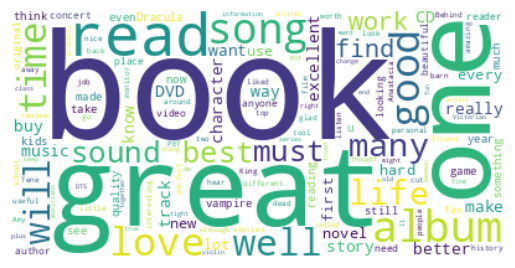

In [7]:
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)
 
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [40]:
from nltk.tokenize import word_tokenize
reviews = pd.read_csv("./amazon_reviews_sample.csv")
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Create an empty list to store the length of the reviews
len_tokens = []

In [41]:


# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

In [42]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS 

# Build the vectorizer
vect = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    able  action  actually  ago  album   amazing  amazon  author      away  \
0   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.274041   
1   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
2   0.0     0.0       0.0  0.0    0.0  0.382773     0.0     0.0  0.000000   
3   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
4   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   

   bad  ...      work  works  world  worst     worth  writing  written  wrong  \
0  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
1  0.0  ...  0.000000    0.0    0.0    0.0  0.219408      0.0      0.0    0.0   
2  0.0  ...  0.142935    0.0    0.0    0.0  0.160089      0.0      0.0    0.0   
3  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
4  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   

   year     years  

In [44]:
# Define X and y
y = reviews.score
X = reviews_transformed

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.789
[[0.412 0.114]
 [0.097 0.377]]
